## Analysing client fingerprint data
Fingerprint data collected in 40 locations in 3rd floor of Lassonde building

### initial setup

#### read files

In [2]:
import pandas as pd
import numpy as np
import json

import os

In [3]:
data_source_prefix = ['../fingerprint_data/fp_data/fpdata/fpdata_', '../fingerprint_data/fp_data/fpdata_2/fpdata_']
points_names = ['r2[{}]'.format(i) for i in range(1, 41)]

In [4]:
dataset_map = {}

for n in points_names:
    # open each file and load the json
    fs = [open(prefix + n + '.json', 'r') for prefix in data_source_prefix]
    js = [json.loads(fi.read()) for fi in fs]
    [fi.close() for fi in fs]
    
    # merge the lists
    res = []
    for j in js:
        res += j
        
    dataset_map[n] = res

In [5]:
len(dataset_map['r2[13]'])

200

In [6]:
dataset_map['r2[13]'][5][9]

{'SSID': 'eduroam', 'BSSID': '1006ed7228cd', 'RSSI': -81.0}

#### select out relevant wifi point sources and discard unneeded ones

In [22]:
all_sources = {}
multimapped_bssid = 0
multimapped_bssid_list = []

# iterate each point of each record to get all access points sources
for pt_key in dataset_map:
    datapts = dataset_map[pt_key]
    
    for p in datapts:
        for ap in p:
            bssid = ap['BSSID']
            ssid = ap['SSID']
            
            # the sources are identified by their bssid
            if bssid not in all_sources:
                # add to map if not yet
                all_sources[bssid] = [ssid, 1]
            else:
                # increment count every encounter
                if ssid == all_sources[bssid][0]:
                    all_sources[bssid][1] += 1
                else:
                    multimapped_bssid += 1
                    multimapped_bssid_list.append((bssid, all_sources[bssid], ssid))

In [23]:
all_sources

{'28cdc104be6f': ['SBU-12', 5741],
 '2c6fc92fecaf': ['DIRECT-AF-HP M506 LaserJet', 930],
 '1006ed580d2f': ['AirYorkPLUS', 3636],
 '1006ed71c860': ['AirYorkPLUS', 473],
 '1006ed716260': ['AirYorkPLUS', 1972],
 '1006ed71f1e0': ['AirYorkPLUS', 2936],
 '1006ed580d20': ['AirYorkPLUS', 3386],
 '28cdc104be74': ['SBU-08', 4173],
 '28cdc104be75': ['SBU-07', 5837],
 '1006ed713b41': ['AirYorkGUEST', 1070],
 '1006ed71c861': ['AirYorkGUEST', 823],
 '1006ed580d21': ['AirYorkGUEST', 1130],
 '98fc114f4c72': ['aeropuerto', 6303],
 'd8ec5e493748': ['north', 5506],
 'd8ec5e49374a': ['north', 4790],
 '28cdc104be6d': ['SBU-13', 5318],
 '1006ed713b42': ['eduroam', 1245],
 '1006ed71f1e2': ['eduroam', 2857],
 '1006ed71c862': ['eduroam', 720],
 '1006ed580d22': ['eduroam', 1249],
 '1006ed713b43': ['WiFi-Info', 1245],
 '1006ed71c863': ['WiFi-Info', 473],
 '1006ed580d23': ['WiFi-Info', 1317],
 '001cdf229c99': ['protein', 5422],
 '28cdc104be7d': ['SBU-01', 6463],
 '54b80a10be5e': ['iNCML', 2193],
 '28cdc104be77': 

In [24]:
active_beacons_numbers = list(range(10)) + [12, 13]
active_beacons = ['SBU-{:02d}'.format(i) for i in active_beacons_numbers]
use_ssids = ['AirYorkGUEST', 'AirYorkPLUS', 'eduroam', 'WiFi-Info', 'north', 'HP-Print-B5-ENVY 4500 series', 'DIRECT-ef-HP M277 LaserJet', 'TPLINK', 'aeropuerto', 'protein', 'DIRECT-AF-HP M506 LaserJet']
combined_ssids = use_ssids + active_beacons

existing_sources = {k:all_sources[k] for k in all_sources if all_sources[k][0] in use_ssids and all_sources[k][1] > 2000}
limited_sources = {k:all_sources[k] for k in all_sources if all_sources[k][0] in use_ssids and all_sources[k][1] > 2500}
beacon_sources = {k:all_sources[k] for k in all_sources if all_sources[k][0] in active_beacons and all_sources[k][1] > 2500}
combined_sources = {k:all_sources[k] for k in all_sources if all_sources[k][0] in combined_ssids and all_sources[k][1] > 2500}

all_rel_sources = {k:all_sources[k] for k in all_sources if all_sources[k][0] in combined_ssids and all_sources[k][1] > 2000}

In [25]:
beacon_sources

{'28cdc104be6f': ['SBU-12', 5741],
 '28cdc104be74': ['SBU-08', 4173],
 '28cdc104be75': ['SBU-07', 5837],
 '28cdc104be6d': ['SBU-13', 5318],
 '28cdc104be7d': ['SBU-01', 6463],
 '28cdc104be77': ['SBU-06', 4638],
 '28cdc104be78': ['SBU-05', 6299],
 '28cdc104be7a': ['SBU-04', 6476],
 '28cdc104be73': ['SBU-09', 4981],
 '28cdc104be0f': ['SBU-02', 6340],
 '28cdc104be7b': ['SBU-03', 5235]}

In [33]:
len(all_sources)

137

In [34]:
len(existing_sources)

25

In [44]:
all_sources_extended_non_beacon = {k:all_sources[k] for k in all_sources if all_sources[k][0] in combined_ssids and all_sources[k][1] > 300}

In [45]:
all_sources_extended_non_beacon = [(k, all_sources_extended_non_beacon[k][0], all_sources_extended_non_beacon[k][1]) for k in all_sources_extended_non_beacon if all_sources_extended_non_beacon[k][0] not in active_beacons]

In [46]:
all_sources_extended_non_beacon = sorted(all_sources_extended_non_beacon, key=lambda x : x[2])

In [47]:
len(all_sources_extended_non_beacon)

88

In [48]:
all_sources_extended_non_beacon

[('1006ed09b120', 'AirYorkPLUS', 341),
 ('1006ed70df42', 'eduroam', 350),
 ('1006ed70df43', 'WiFi-Info', 350),
 ('1006ed70df40', 'AirYorkPLUS', 350),
 ('1006ed70df41', 'AirYorkGUEST', 350),
 ('1006ed724fe3', 'WiFi-Info', 379),
 ('1006ed724fe0', 'AirYorkPLUS', 391),
 ('1006ed71134c', 'WiFi-Info', 442),
 ('1006ed71134e', 'AirYorkGUEST', 442),
 ('1006ed71134f', 'AirYorkPLUS', 442),
 ('1006ed71134d', 'eduroam', 442),
 ('1006edc0bb21', 'AirYorkGUEST', 467),
 ('1006edc0bb22', 'eduroam', 467),
 ('1006edc0bb23', 'WiFi-Info', 467),
 ('1006ed71c860', 'AirYorkPLUS', 473),
 ('1006ed71c863', 'WiFi-Info', 473),
 ('1006ed724fe1', 'AirYorkGUEST', 479),
 ('1006ed70df4f', 'AirYorkPLUS', 601),
 ('1006ed71c862', 'eduroam', 720),
 ('1006ed716263', 'WiFi-Info', 742),
 ('1006ed71f1ed', 'eduroam', 784),
 ('1006ed71c861', 'AirYorkGUEST', 823),
 ('d8ec5e493749', 'north', 888),
 ('2c6fc92fecaf', 'DIRECT-AF-HP M506 LaserJet', 930),
 ('1006ed711341', 'AirYorkGUEST', 934),
 ('1006ed42bfc2', 'eduroam', 1014),
 ('100

### define the 2d coordinates for regression

In [49]:
coords_2d = [
             [0, 0],                                         [6, 0], 
             [0, 1], [1, 1], [2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1],
             [0, 2],                                         [6, 2],
             [0, 3],                                         [6, 3],
             [0, 4],                                         [6, 4],
             [0, 5],                                         [6, 5],
             [0, 6], [1, 6], [2, 6], [3, 6], [4, 6], [5, 6], [6, 6], 
    [-1, 7], [0, 7],                                         [6, 7],
    [-1, 8], [0, 8],                                         [6, 8],
             [0, 9],                                         [6, 9],
             [0,10], [1,10], [2,10], [3,10], [4,10], [5,10], [6,10],
]

In [50]:
len(coords_2d)

40

In [51]:
coords_map = {}
for i in range(40):
    coords_map[points_names[i]] = coords_2d[i]

### create new Pandas DataFrames for running the machine learning

In [57]:
selected_bssid_list = list(combined_sources.keys())
beacon_bssid_list = list(beacon_sources.keys())
existing_bssid_list = list(existing_sources.keys())
limited_bssid_list = list(limited_sources.keys())

all_rel_bssid_list = list(all_rel_sources.keys())
all_bssid_list = list(all_sources.keys())

In [58]:
extended_non_beacon_bssid_list = [s[0] for s in all_sources_extended_non_beacon]

In [59]:
extended_with_beacon_bssid_list = extended_non_beacon_bssid_list + beacon_bssid_list

#### version where non existent values are put as NaN

In [60]:
data = []

# iterate each data point to create new dataset
for pt_key in dataset_map:
    datapts = dataset_map[pt_key]
    coord_x = coords_map[pt_key][0]
    coord_y = coords_map[pt_key][1]
    
    for p in datapts:
        cur_data = [pt_key, coord_x, coord_y, ]
        cur_sources_present = {}
        for ap in p:
            bssid = ap['BSSID']
            ssid = ap['SSID']
            if bssid in all_bssid_list:
                cur_sources_present[bssid] = ap['RSSI']
    
        # for creating each column in the new df
        for selected_beacon in all_bssid_list:
            cur_data.append(cur_sources_present.get(selected_beacon, float('NaN')))
    
        data.append(cur_data)

# Create the pandas DataFrame
df_tabified_withnan = pd.DataFrame(data, columns=['fp_name', 'coord_x', 'coord_y'] + all_bssid_list)

In [61]:
df_tabified_withnan

,fp_name,coord_x,coord_y,28cdc104be6f,2c6fc92fecaf,1006ed580d2f,1006ed71c860,1006ed716260,1006ed71f1e0,1006ed580d20,...,1006ed70df4f,0492268269fc,1006ed70df42,1006ed70df43,1006ed70df40,1006ed70df41,1006edc0bb21,1006edc0bb22,1006edc0bb23,1006edc0bb20
0,r2[1],0,0,-59.5,-88.5,-70.0,-80.0,-50.5,-77.5,-74.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,r2[1],0,0,-59.5,-88.5,-70.0,-80.0,-50.5,-77.5,-74.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,r2[1],0,0,-59.5,-88.5,-70.0,-80.0,-50.5,-77.5,-74.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,r2[1],0,0,-59.5,-88.5,-70.0,-80.0,-50.5,-77.5,-74.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,r2[1],0,0,-59.5,-88.5,-70.0,-80.0,-50.5,-77.5,-74.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,r2[40],6,10,-77.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-73.5,-73.5,-73.5,-73.5
7996,r2[40],6,10,-77.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-73.5,-73.5,-73.5,-73.5
7997,r2[40],6,10,-77.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-73.5,-73.5,-73.5,-73.5
7998,r2[40],6,10,-77.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-73.5,-73.5,-73.5,-73.5


#### version for extended sources list

In [113]:
data = []

# iterate each data point to create new dataset
for pt_key in dataset_map:
    datapts = dataset_map[pt_key]
    coord_x = coords_map[pt_key][0]
    coord_y = coords_map[pt_key][1]
    
    for p in datapts:
        cur_data = [pt_key, coord_x, coord_y, ]
        cur_sources_present = {}
        for ap in p:
            bssid = ap['BSSID']
            ssid = ap['SSID']
            if bssid in extended_non_beacon_bssid_list:
                cur_sources_present[bssid] = ap['RSSI']
    
        # for creating each column in the new df
        for selected_beacon in extended_non_beacon_bssid_list:
            cur_data.append(cur_sources_present.get(selected_beacon, float('NaN')))
    
        data.append(cur_data)

# Create the pandas DataFrame
df_tabified_ext = pd.DataFrame(data, columns=['fp_name', 'coord_x', 'coord_y'] + extended_non_beacon_bssid_list)

In [114]:
df_tabified_ext

,fp_name,coord_x,coord_y,1006ed71626d,1006ed714cc1,1006ed714cc2,1006ed711340,1006ed42bfc3,1006ed71626c,1006ed71626e,...,1006ed71f1e0,1006ed71f1e1,1006ed71f1e3,1006ed580d20,1006ed580d2f,da5de23e31ef,d8ec5e49374a,001cdf229c99,d8ec5e493748,98fc114f4c72
0,r2[1],0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-77.5,NaN,NaN,-74.5,-70.0,-83.5,-83.5,-67.5,-74.5,-78.5
1,r2[1],0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-77.5,NaN,NaN,-74.5,-70.0,-83.5,-83.5,-67.5,-74.5,-78.5
2,r2[1],0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-77.5,NaN,NaN,-74.5,-70.0,-83.5,-83.5,-67.5,-74.5,-78.5
3,r2[1],0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-77.5,NaN,NaN,-74.5,-70.0,-83.5,-83.5,-67.5,-74.5,-78.5
4,r2[1],0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-77.5,NaN,NaN,-74.5,-70.0,-83.5,-83.5,-67.5,-74.5,-78.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,r2[40],6,10,NaN,NaN,NaN,-73.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7996,r2[40],6,10,NaN,NaN,NaN,-73.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7997,r2[40],6,10,NaN,NaN,NaN,-73.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7998,r2[40],6,10,NaN,NaN,NaN,-73.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Machine learning

### setups

In [62]:
import sklearn
import sklearn.ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import sklearn.multioutput
import sklearn.neural_network

In [63]:
# fit a model and get its validation stats
def modelstats_classification(X, y, model_create, splitter):
    models = []
    err_scores = []
    
    for i, (train_index, test_index) in enumerate(splitter.split(X, y)):
        X_train , X_test = X[train_index,:], X[test_index,:]
        y_train , y_test = y[train_index], y[test_index]
        
        model = model_create()
    
        model.fit(X_train,y_train)
        pred_values = model.predict(X_test)
        
        pred_values_coord = np.array([coords_map[v] for v in pred_values])
        y_test_coord = np.array([coords_map[v] for v in y_test])
        
        err = sklearn.metrics.mean_squared_error(pred_values_coord, y_test_coord)
        err_scores.append(err)
        models.append(model)

    # the total average error distance of all folds
    avg_err_dist = (sum(err_scores)/len(err_scores)) ** 0.5
    
    return {'dist': avg_err_dist, 'scores': err_scores, 'models': models}
    
def modelstats_regression(X, y, c, model_create, splitter):
    models = []
    err_scores = []
    
    for i, (train_index, test_index) in enumerate(splitter.split(X, c)):
        X_train , X_test = X[train_index,:], X[test_index,:]
        y_train , y_test = y[train_index], y[test_index]
        
        model = model_create()
    
        model.fit(X_train,y_train)
        pred_values = model.predict(X_test)
        
        err = sklearn.metrics.mean_squared_error(pred_values, y_test)
        err_scores.append(err)
        models.append(model)

    # the total average error distance of all folds
    avg_err_dist = (sum(err_scores)/len(err_scores)) ** 0.5
    
    return {'dist': avg_err_dist, 'scores': err_scores, 'models': models}

In [64]:
X_comb = df_tabified_withnan[selected_bssid_list].to_numpy()
X_prex = df_tabified_withnan[existing_bssid_list].to_numpy()
X_plim = df_tabified_withnan[limited_bssid_list].to_numpy()
X_beac = df_tabified_withnan[beacon_bssid_list].to_numpy()

tags = ['pre-existing', 'pre-existing limited', 'combined', 'beacons']

X_set = [X_prex, X_plim, X_comb, X_beac]
X_set_filled = [np.nan_to_num(X, nan=-101) for X in X_set]

y_cls = df_tabified_withnan['fp_name'].to_numpy()
y_reg = df_tabified_withnan[['coord_x', 'coord_y']].to_numpy()

k = 5
skf = sklearn.model_selection.StratifiedKFold(n_splits=k, random_state=129, shuffle=True)

### machine leaning runs

#### K Nearest Neighbors from scikit learn (new)

In [82]:
def create_knn():
    return KNeighborsClassifier(n_neighbors=5)

dists = []
results = []

for X in X_set_filled:
    stats = modelstats_classification(X, y_cls, create_knn, skf)
    results.append(stats)
    dists.append(stats['dist'])

for i in range(3):
    print('Average error distance of', tags[i], ': ', dists[i])

Average error distance of pre-existing :  0.7026734661277598
Average error distance of pre-existing limited :  2.093367502375061
Average error distance of combined :  0.39218936752543404


#### K Nearest Neighbors, distance weighted from scikit learn (new)

In [83]:
def create_dwknn():
    return KNeighborsClassifier(n_neighbors=5, weights='distance')

dists = []
results = []

for X in X_set_filled:
    stats = modelstats_classification(X, y_cls, create_dwknn, skf)
    results.append(stats)
    dists.append(stats['dist'])

for i in range(3):
    print('Average error distance of', tags[i], ': ', dists[i])

Average error distance of pre-existing :  0.6972714679377036
Average error distance of pre-existing limited :  2.0910374219511234
Average error distance of combined :  0.39083244491725605


#### HistGradientBoostingClassifier from scikit learn (new)

In [84]:
def create_hgbc():
    return sklearn.ensemble.HistGradientBoostingClassifier()

dists = []
results = []

for X in X_set:
    stats = modelstats_classification(X, y_cls, create_hgbc, skf)
    results.append(stats)
    dists.append(stats['dist'])

for i in range(3):
    print('Average error distance of', tags[i], ': ', dists[i])

Average error distance of pre-existing :  0.43423783805651944
Average error distance of pre-existing limited :  0.823407554009556
Average error distance of combined :  0.33326040868966117


#### HistGradientBoostingRegressor from scikit learn (new)

In [85]:
def create_hgbr():
    return sklearn.multioutput.MultiOutputRegressor(sklearn.ensemble.HistGradientBoostingRegressor())

dists = []
results = []

for X in X_set:
    stats = modelstats_regression(X, y_reg, y_cls, create_hgbr, skf)
    results.append(stats)
    dists.append(stats['dist'])

for i in range(3):
    print('Average error distance of', tags[i], ': ', dists[i])

Average error distance of pre-existing :  0.38581189700312224
Average error distance of pre-existing limited :  0.7533829057239336
Average error distance of combined :  0.2761940671787414


#### MLPClassifier from scikit learn (new)

In [86]:
def create_mlpc():
    return sklearn.neural_network.MLPClassifier()

dists = []
results = []

for X in X_set_filled:
    stats = modelstats_classification(X, y_cls, create_mlpc, skf)
    results.append(stats)
    dists.append(stats['dist'])

for i in range(3):
    print('Average error distance of', tags[i], ': ', dists[i])

Average error distance of pre-existing :  0.6163400035694584
Average error distance of pre-existing limited :  0.9056765427016424
Average error distance of combined :  0.3794733192202055


#### MLPRegressor from scikit learn (new)

In [87]:
def create_mlpr():
    return sklearn.neural_network.MLPRegressor()

dists = []
results = []

for X in X_set_filled:
    stats = modelstats_regression(X, y_reg, y_cls, create_mlpr, skf)
    results.append(stats)
    dists.append(stats['dist'])

for i in range(3):
    print('Average error distance of', tags[i], ': ', dists[i])

C:\Users\Kevvol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Kevvol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Kevvol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Kevvol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the 

Average error distance of pre-existing :  1.0482366735255988
Average error distance of pre-existing limited :  1.1407733067698618
Average error distance of combined :  0.7816544678030101


C:\Users\Kevvol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Comparing just existing sources vs. beacon added

In [68]:
import matplotlib.pyplot as plt

#### HistGradientBoostingRegressor with the extended list
looking for the relationship between # of aps vs. avg. error

In [66]:
print('amount of bssids in extended set:', len(extended_non_beacon_bssid_list))

amount of bssids in extended set: 88


In [67]:
def create_hgbr():
    return sklearn.multioutput.MultiOutputRegressor(sklearn.ensemble.HistGradientBoostingRegressor())

In [70]:
#dists = []
results = []

# track amount of ap used vs average errors in distance
amount_aps = []
res_errors = []

l = len(extended_non_beacon_bssid_list)

# try from 3 to 38
for i in range(3, l+1):
    bssids = extended_non_beacon_bssid_list[l-i:]
    X = df_tabified_withnan[bssids].to_numpy()
    
    stats = modelstats_regression(X, y_reg, y_cls, create_hgbr, skf)
    results.append(stats)
    res_errors.append(stats['dist'])
    amount_aps.append(i)


In [71]:
print('# of ap ' + '\t\t' + 'avg. distance')
for i in range(len(amount_aps)):
    print(amount_aps[i], '\t\t', res_errors[i])

# of ap 		avg. distance
3 		 0.9399699272738233
4 		 0.9253142000975176
5 		 0.9257170329091075
6 		 0.7615617283558105
7 		 0.7528214770526884
8 		 0.7531782944927706
9 		 0.7529194675851738
10 		 0.7530365172702981
11 		 0.7531489053241774
12 		 0.7531425775944017
13 		 0.7531919077880772
14 		 0.7531525230293646
15 		 0.7528342230582727
16 		 0.7523673699949193
17 		 0.7525483237729812
18 		 0.3811378656424341
19 		 0.38810570132378636
20 		 0.3881276305165083
21 		 0.3880278844736678
22 		 0.3881520310411641
23 		 0.38814365783783
24 		 0.3819235766782382
25 		 0.3857178760541859
26 		 0.37809467124804064
27 		 0.3639456013355232
28 		 0.2799694034656181
29 		 0.28043322566990597
30 		 0.28004790657869
31 		 0.2798506451966434
32 		 0.2798459744814126
33 		 0.2798480503662209
34 		 0.2794684457360738
35 		 0.2760282537338207
36 		 0.27573309155212183
37 		 0.27584130731492384
38 		 0.27588997303438806
39 		 0.2729141412774889
40 		 0.2728653201788518
41 		 0.2728653201788518
42 		 

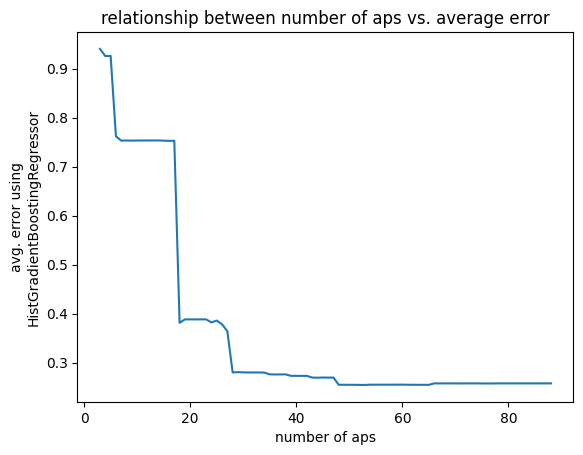

In [72]:
plt.plot(amount_aps, res_errors)
plt.title('relationship between number of aps vs. average error')
plt.xlabel('number of aps')
plt.ylabel('avg. error using\nHistGradientBoostingRegressor')
plt.savefig('plot.png')

#### now combine them with beacons and check accuracy

In [73]:
#dists = []
results_2 = []

# track amount of ap used vs average errors in distance
amount_aps_2 = []
res_errors_2 = []

l = len(extended_non_beacon_bssid_list)

# try from 3 to 38
for i in range(3, l+1):
    bssids = extended_non_beacon_bssid_list[l-i:]
    X = df_tabified_withnan[bssids + beacon_bssid_list].to_numpy()
    
    stats = modelstats_regression(X, y_reg, y_cls, create_hgbr, skf)
    results_2.append(stats)
    res_errors_2.append(stats['dist'])
    amount_aps_2.append(i)


In [74]:
print('# of ap (w/ beacons)' + '\t' + 'avg. distance')
for i in range(len(amount_aps)):
    print(amount_aps_2[i], '\t\t', res_errors_2[i])

# of ap (w/ beacons)	avg. distance
3 		 0.28839152267757573
4 		 0.28934510810201225
5 		 0.29431472623619775
6 		 0.28933820706417085
7 		 0.2746799959274011
8 		 0.27453900690005584
9 		 0.2748189320504612
10 		 0.27361405821021356
11 		 0.27322308757428554
12 		 0.2780291787124175
13 		 0.27801739705840117
14 		 0.27809191713051484
15 		 0.2787745935698768
16 		 0.2750212204480431
17 		 0.27480330984352674
18 		 0.2712738419503665
19 		 0.272785400237798
20 		 0.2727344187668955
21 		 0.273024002383124
22 		 0.27306937853473456
23 		 0.2730387187442182
24 		 0.2702384631536413
25 		 0.2706373172639248
26 		 0.26894816123972215
27 		 0.26556131214845125
28 		 0.2656240846896914
29 		 0.2656189283343471
30 		 0.2687058210406294
31 		 0.2679078877708031
32 		 0.2677831419088822
33 		 0.26780862452059045
34 		 0.26801943079490664
35 		 0.26694690077679273
36 		 0.26717837134368977
37 		 0.26717837134368977
38 		 0.26759934020488907
39 		 0.2655154547775194
40 		 0.26527385834916445
41 	

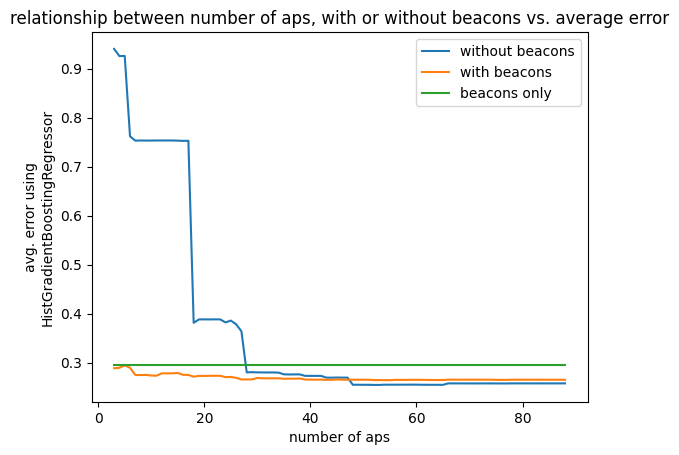

In [81]:
plt.plot(amount_aps, res_errors, label='without beacons')
plt.plot(amount_aps_2, res_errors_2, label='with beacons')
plt.plot(amount_aps_2, [0.29566,] * (l-2), label='beacons only')
plt.title('relationship between number of aps, with or without beacons vs. average error')
plt.xlabel('number of aps')
plt.ylabel('avg. error using\nHistGradientBoostingRegressor')
plt.legend()
plt.savefig('plot2.png')

## Machine learning (old)

### K Nearest Neighbors from scikit learn

In [109]:
k = 5
skf = sklearn.model_selection.StratifiedKFold(n_splits=k, random_state=129, shuffle=True)
models = []

In [110]:
acc_score = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train , X_test = X[train_index,:], X[test_index,:]
    y_train , y_test = y[train_index], y[test_index]
    
    model = KNeighborsClassifier(n_neighbors=5)
    
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    acc = sklearn.metrics.accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    models.append(model)

avg_acc_score = sum(acc_score)/k

In [111]:
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.7775, 0.76375, 0.764375, 0.7775, 0.75625]
Avg accuracy : 0.767875


##### treating it as regression and calculate the error

In [117]:
pred_values_coord = np.array([coords_map[v] for v in pred_values])
y_test_coord = np.array([coords_map[v] for v in y_test])

In [119]:
sklearn.metrics.mean_squared_error(pred_values_coord, y_test_coord) ** 0.5

0.3737479096931513

### HistGradientBoostingClassifier from scikit learn

In [42]:
X = df_tabified_withnan[selected_bssid_list].to_numpy()
y = df_tabified_withnan['fp_name'].to_numpy()

In [43]:
k = 5
skf = sklearn.model_selection.StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
models = []

In [44]:
acc_score = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train , X_test = X[train_index,:], X[test_index,:]
    y_train , y_test = y[train_index], y[test_index]
    
    model = sklearn.ensemble.HistGradientBoostingClassifier()
    
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    acc = sklearn.metrics.accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    models.append(model)

avg_acc_score = sum(acc_score)/k

In [45]:
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.86125, 0.86375, 0.8725, 0.87, 0.874375]
Avg accuracy : 0.868375


### HistGradientBoostingRegressor from scikit learn

In [99]:
X = df_tabified_withnan[selected_bssid_list].to_numpy()
y = df_tabified_withnan[['coord_x', 'coord_y']].to_numpy()
c = df_tabified_withnan['fp_name'].to_numpy()

In [100]:
k = 5
skf = sklearn.model_selection.StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
models = []

In [105]:
acc_score = []

for i, (train_index, test_index) in enumerate(skf.split(X, c)):
    X_train , X_test = X[train_index,:], X[test_index,:]
    y_train , y_test = y[train_index, :], y[test_index, :]
    
    model = sklearn.multioutput.MultiOutputRegressor(sklearn.ensemble.HistGradientBoostingRegressor())
    
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    acc = sklearn.metrics.mean_squared_error(pred_values , y_test)
    acc_score.append(acc)
    models.append(model)

avg_acc_score = sum(acc_score)/k

In [107]:
print('error of each fold - {}'.format(acc_score))
print('Avg error : {}'.format(avg_acc_score))
print('Avg error root : {}'.format(avg_acc_score ** 0.5))

error of each fold - [0.06183335782312781, 0.07710564324871068, 0.06582033399687066, 0.0740308471879848, 0.07116986112236147]
Avg error : 0.06999200867581108
Avg error root : 0.2645600284922329


## notes

We want to construct a table that compares the average MSE of:

- just existing points
- all access points
- just smart beacons 

compared with methods:

- KNeighborsClassifier
- KNeighborsClassifier, distance weighted
- HistGradientBoostingClassifier
- MLPClassifier

- HistGradientBoostingRegressor
- MLPRegressor

In [124]:
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

In [125]:
sklearn.metrics.mean_squared_error(y_true, y_pred)

0.375

In [128]:
np.sum((y_true - y_pred) ** 2) / 4

0.375